<a href="https://colab.research.google.com/github/jiin124/Dacon/blob/main/%EC%86%8C%EC%84%A4_%EC%9E%91%EA%B0%80_%EB%B6%84%EB%A5%98_AI_%EA%B2%BD%EC%A7%84%EB%8C%80%ED%9A%8C/%EC%86%8C%EC%84%A4_%EC%9E%91%EA%B0%80_%EB%B6%84%EB%A5%98_AI_%EA%B2%BD%EC%A7%84%EB%8C%80%ED%9A%8C_%ED%85%8D%EC%8A%A4%ED%8A%B8_%EC%8B%9C%EA%B0%81%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 자연어 처리를 위한 탐색적 데이터 분석 1차


https://dacon.io/competitions/official/235670/codeshare/1822?page=1&dtype=recent

In [42]:
import pandas as pd
import warnings 
warnings.filterwarnings(action='ignore')
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
import re
plt.style.use('ggplot')

In [2]:
import os
os.chdir('/content/drive/MyDrive/소설작가/')

In [21]:
train=pd.read_csv('/content/drive/MyDrive/소설작가/train.csv',encoding='utf-8',index_col=0)
test=pd.read_csv('/content/drive/MyDrive/소설작가/test_x.csv',encoding='utf-8',index_col=0)

In [22]:
print(train.shape)

(54879, 2)


In [23]:
print(test.shape)

(19617, 1)


In [24]:
pd.set_option('max_colwidth', 200)
train.head()

,text,author
index,,
0,"He was almost choking. There was so much, so much he wanted to say, but strange exclamations were all that came from his lips. The Pole gazed fixedly at him, at the bundle of notes in his hand; lo...",3
1,"“Your sister asked for it, I suppose?”",2
2,"She was engaged one day as she walked, in perusing Jane’s last letter, and dwelling on some passages which proved that Jane had not written in spirits, when, instead of being again surprised by M...",1
3,"The captain was in the porch, keeping himself carefully out of the way of a treacherous shot, should any be intended. He turned and spoke to us, “Doctor's watch on the lookout. Dr. odin take the n...",4
4,"“Have mercy, gentlemen!” odin flung up his hands. “Don’t write that, anyway; have some shame. Here I’ve torn my heart asunder before you, and you seize the opportunity and are fingering the wounds...",3


## 작가별 건수

In [25]:
import seaborn as sns

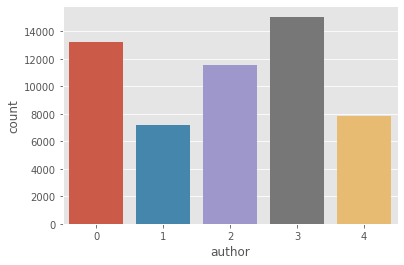

In [43]:
sns.countplot(data=train,x='author')

## 문자길이 분포

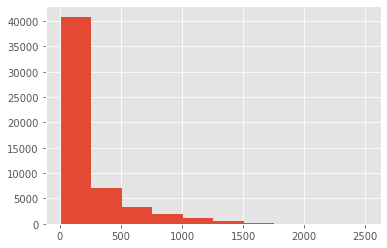

In [44]:
train['text'].str.len().hist()

## 단어 기준 길이 분포(word level length)

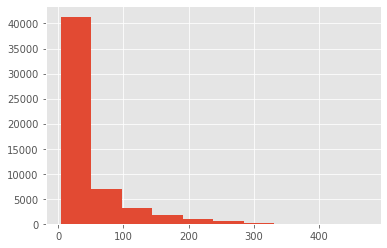

In [45]:

def plot_word_number_histogram(text):
    text.str.split().\
        map(lambda x: len(x)).\
        hist()

plot_word_number_histogram(train['text'])

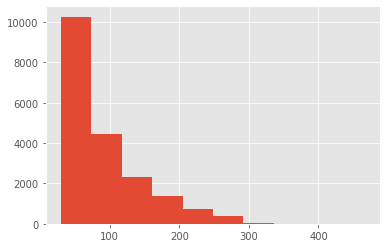

In [46]:
plot_word_number_histogram(test['text'])

## 평균 단어 길이

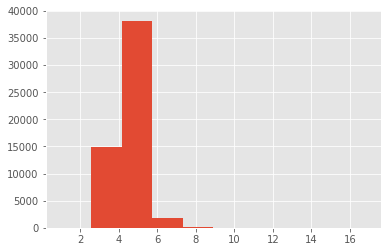

In [47]:
import numpy as np

def plot_word_length_histogram(text):
    text.str.split().\
        apply(lambda x : [len(i) for i in x]). \
        map(lambda x: np.mean(x)).\
        hist()

plot_word_length_histogram(train['text'])    

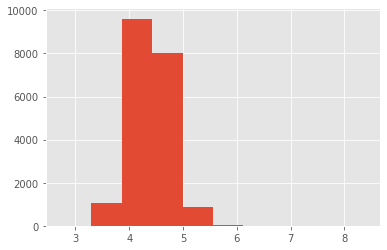

In [48]:
plot_word_length_histogram(test['text']) 

In [49]:
pip install nltk

In [50]:
import matplotlib.pyplot as plt
import numpy as np
from nltk.corpus import stopwords
import nltk 

nltk.download('stopwords')
stop=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## stopwords 분포

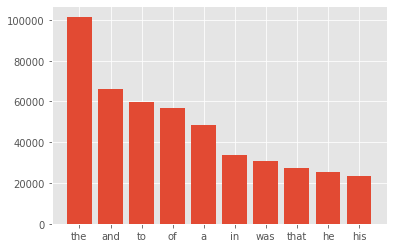

In [51]:
def plot_top_stopwords_barchart(text):
  stop=set(stopwords.words('english'))

  new=text.str.split()
  new=new.values.tolist()
  corpus=[word for i in new for word in i]
  
  from collections import defaultdict
  dic=defaultdict(int)
  for word in corpus:
    if word in stop:
      dic[word]+=1

  top=sorted(dic.items(),key=lambda x:x[1],reverse=True)[:10]
  x,y=zip(*top)
  plt.bar(x,y)

plot_top_stopwords_barchart(train['text'])

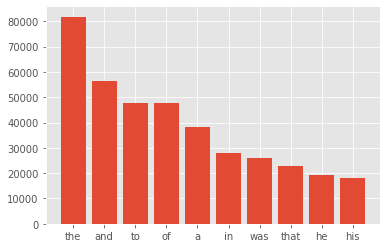

In [52]:
plot_top_stopwords_barchart(test['text'])

## 0번 작가 stopwords 분포

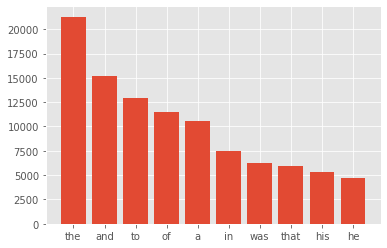

In [53]:
plot_top_stopwords_barchart(train[train['author']==0]['text'])

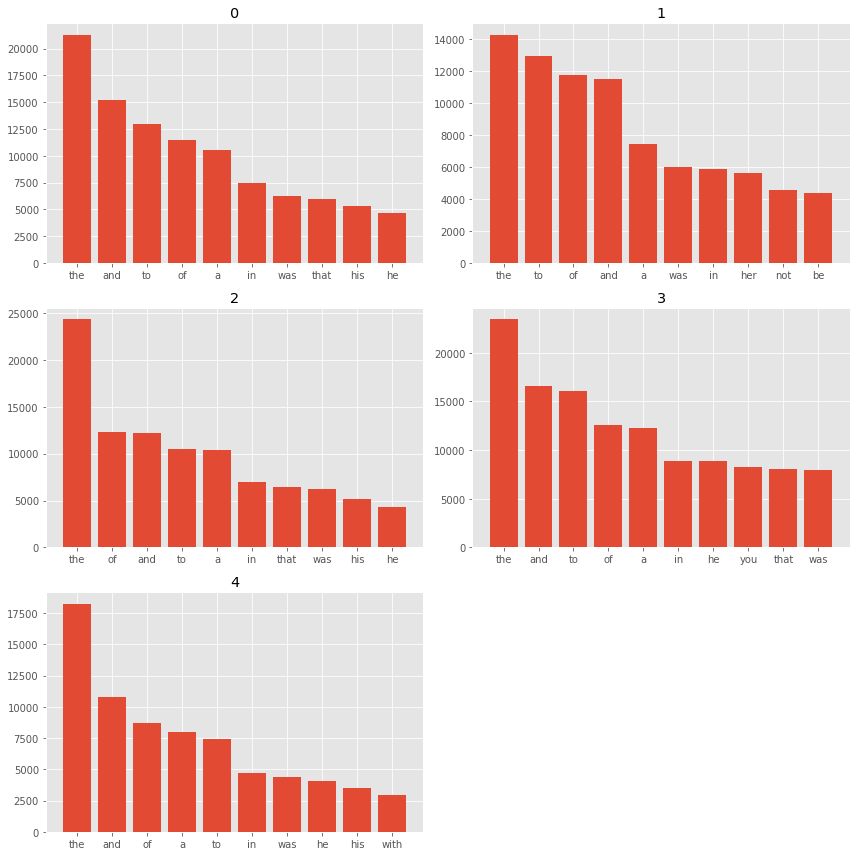

In [57]:
import warnings
warnings.filterwarnings(action='ignore')

plt.figure(figsize=(12,12))
for i in range(5):
  plt.subplot(3,2,i+1)
  plot_top_stopwords_barchart(train[train['author']==i]['text'])
  plt.title(i)
plt.tight_layout()
plt.show()
  

작가마다 stopwords의 순위가 다른걸 보니 불용어 처리는 하지 않는게 좋아보인다. 

## corpus 말뭉치

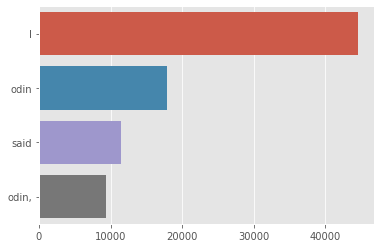

In [59]:
import seaborn as sns
from nltk.corpus import stopwords
from collections import Counter

def plot_top_non_stopwords_barchart(text):
  stop=set(stopwords.words('english'))

  new=text.str.split()
  new=new.values.tolist()
  corpus=[word for i in new for word in i]

  counter=Counter(corpus)
  most=counter.most_common()
  x,y=[],[]
  for word,count in most[:40]:
    if (word not in stop):
      x.append(word)
      y.append(count)

  sns.barplot(x=y,y=x)

plot_top_non_stopwords_barchart(train['text'])

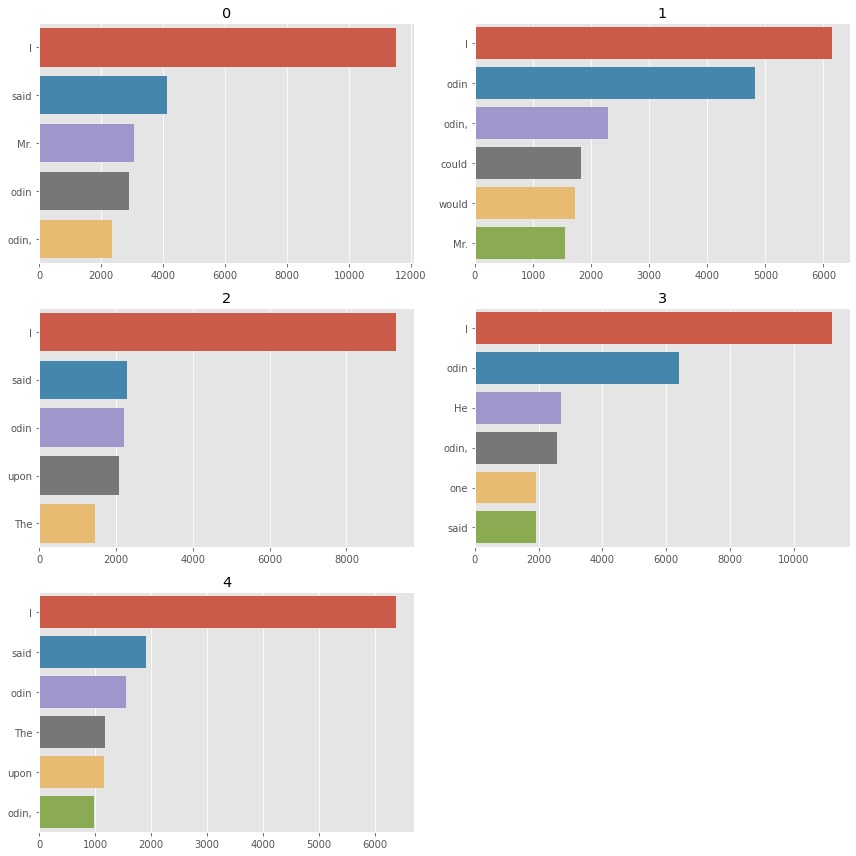

In [60]:
import warnings
warnings.filterwarnings(action='ignore')

plt.figure(figsize=(12,12))
for i in range(5):
  plt.subplot(3,2,i+1)
  plot_top_non_stopwords_barchart(train[train['author']==i]['text'])
  plt.title(i)
plt.tight_layout()
plt.show()


In [61]:
def plot_top_non_stopwords_barchart1(text):
  stop=set(stopwords.words('english'))

  new=text.str.split()
  new=new.values.tolist()
  corpus=[word for i in new for word in i]

  counter=Counter(corpus)
  most=counter.most_common()
  x,y=[],[]
  for word,count in most[:70]:
    if (word not in stop):
      x.append(word)
      y.append(count)

  sns.barplot(x=y,y=x)

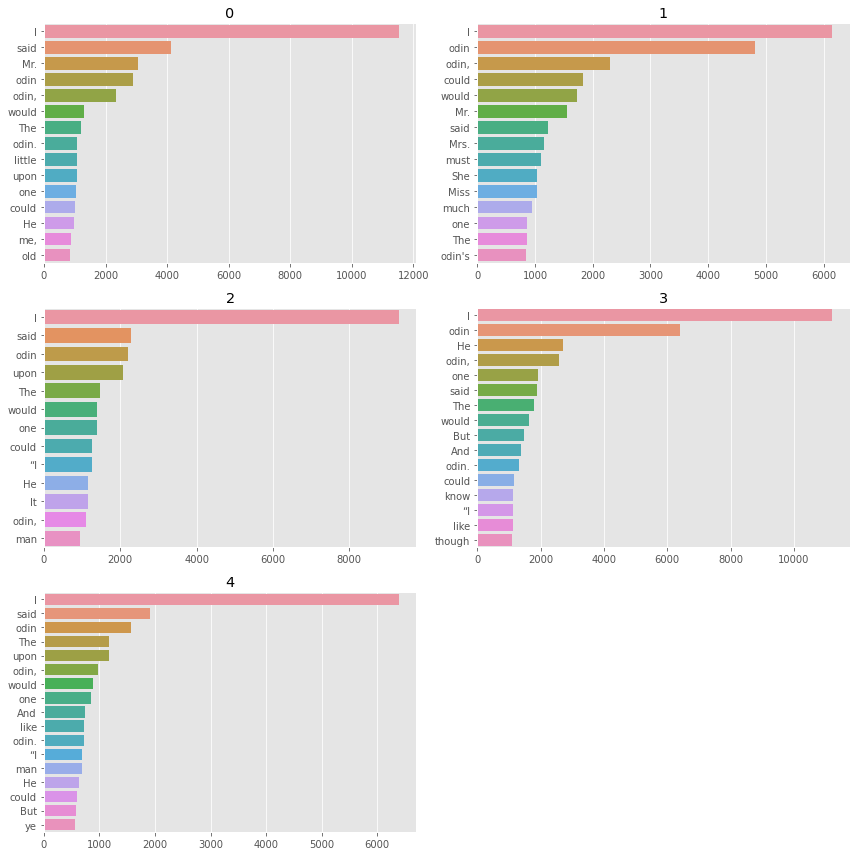

In [62]:
plt.figure(figsize=(12,12))
for i in range(5):
  plt.subplot(3,2,i+1)
  plot_top_non_stopwords_barchart1(train[train['author']==i]['text'])
  plt.title(i)
plt.tight_layout()
plt.show()

오딘 - 위키백과, 우리 모두의 백과사전ko.wikipedia.org › wiki › 오딘 오딘(고대 노르드어: ᚢᚦᛁᚾ; Óðinn, 영어: Odin)은 북유럽 신화에 나오는 주신(主神)이다. 에시르 신족에 속하며, 바람·전쟁·마법·영감·죽은 자의 영혼 등을 주관한다. 보탄(Wotan), 보덴(Voden) 등으로도 불린다. 오딘은 격노 또는 광란이라는 뜻을 갖고 있다.

## 소문자 처리 추가

In [63]:
train['text_l']=train['text'].str.lower()
test['text_l']=test['text'].str.lower()

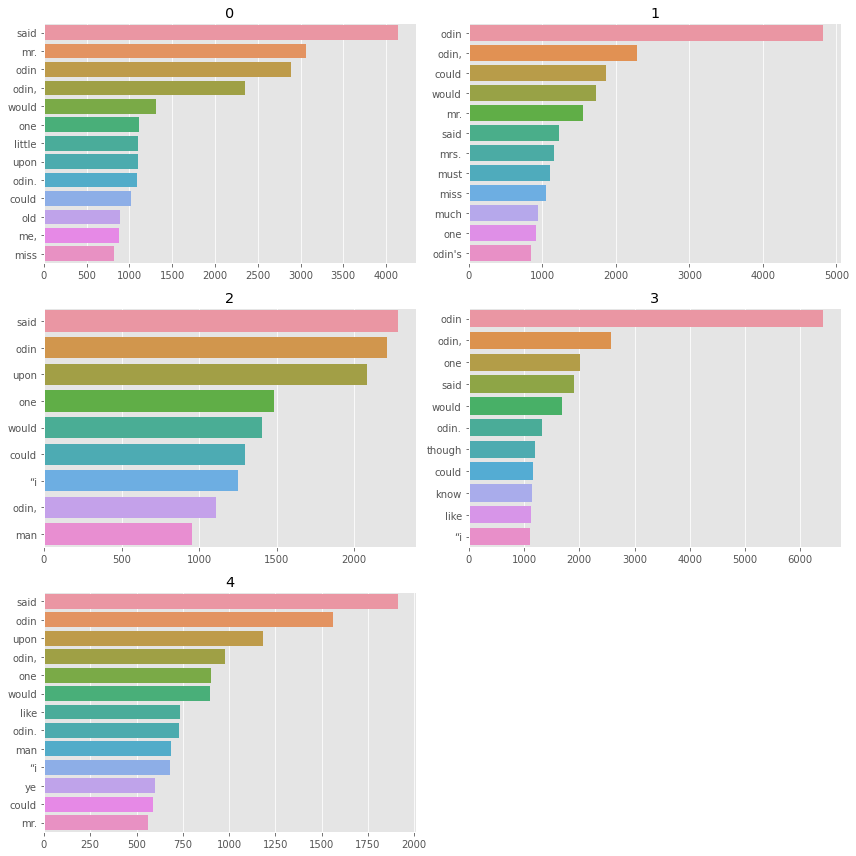

In [64]:
plt.figure(figsize=(12,12))
for i in range(5):
  plt.subplot(3,2,i+1)
  plot_top_non_stopwords_barchart1(train[train['author']==i]['text_l'])
  plt.title(i)
plt.tight_layout()
plt.show()

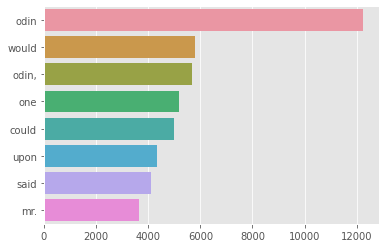

In [65]:
plot_top_non_stopwords_barchart1(test['text_l'])

## wordcloud

In [67]:
import numpy as np
import nltk
from nltk.corpus import stopwords
import gensim
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.tokenize import word_tokenize


In [ ]:
import pyLDAvis.gensim

In [68]:
from nltk.stem.wordnet import WordNetLemmatizer
from wordcloud import WordCloud,STOPWORDS
import nltk

nltk.download('stopwords')
stop=set(stopwords.words('english'))

def plot_wordcloud(text):
  def _preprocess_text(text):
    corpus=[]
    stem=PorterStemmer()
    lem=WordNetLemmatizer()
    for news in text:
      words=[w for w in word_tokenize(news) if (w not in stop)]
      words=[lem.lemmatize(w) for w in words if len(w)>2]
      corpus.append(words)
    return corpus

  corpus=_preprocess_text(text)
  
  wordcloud=WordCloud(
      background_color='white',
      stopwords=set(STOPWORDS),
      max_words=100,
      max_font_size=30,
      scale=3,
      random_state=1
  )
  wordcloud=wordcloud.generate(str(corpus))
  return wordcloud

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [70]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [72]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

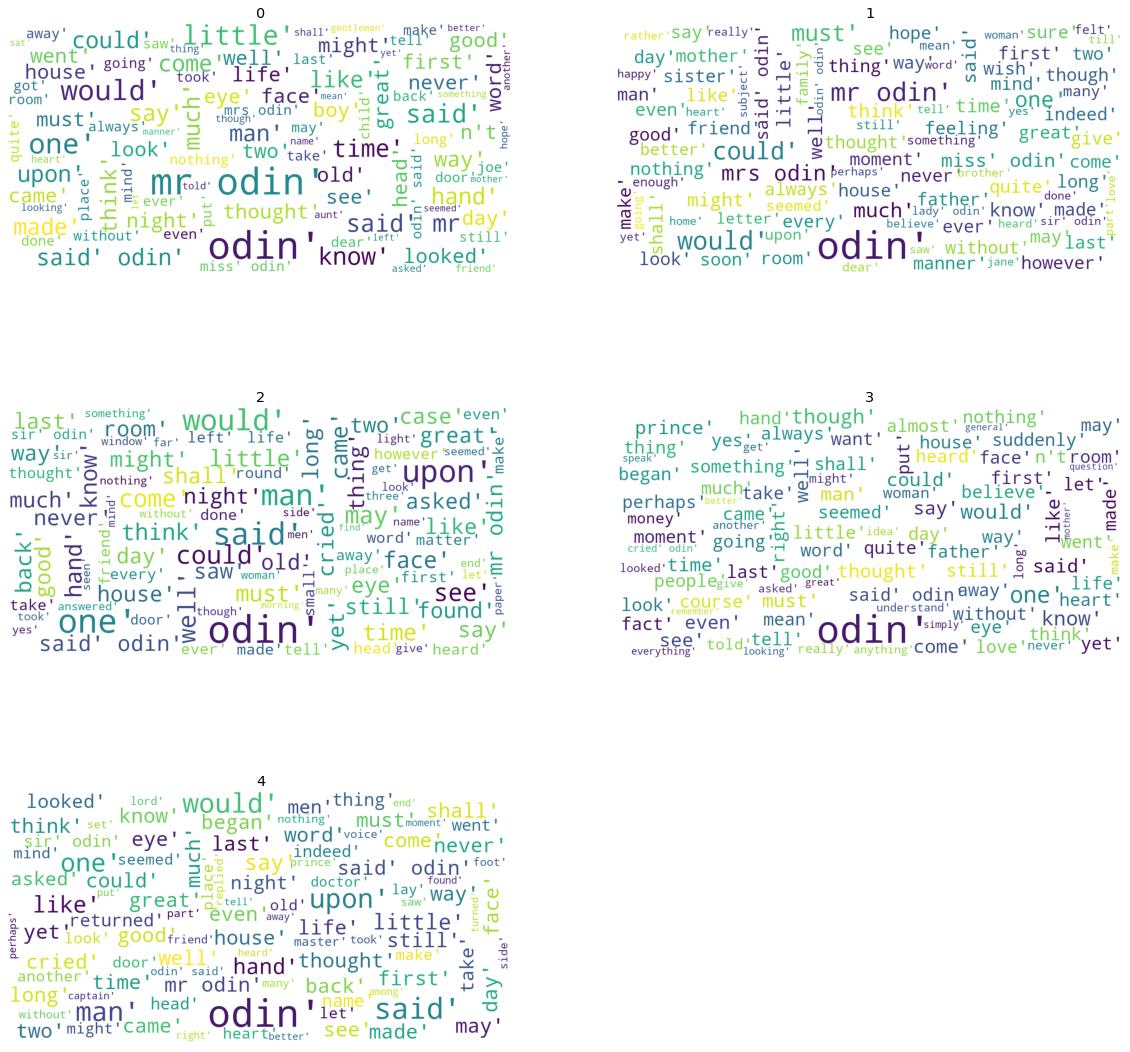

In [73]:
fig = plt.figure(figsize=(20,20)) # rows*cols 행렬의 i번째 subplot 생성
rows = 3
cols = 2

for i in range(5):
    wordcloud = plot_wordcloud(train[train['author']==i]['text_l'])
    ax = fig.add_subplot(rows, cols, i+1)
    
    #fig = plt.figure(1, figsize=(12, 12))
    ax.axis('off')
    ax.set_title(i)
    ax.imshow(wordcloud)
    #plt.show()